In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

2022-04-08 14:50:47.058081: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/software/proxychains/lib:/usr/local/munge/lib:
2022-04-08 14:50:47.058119: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Load the data

In [2]:
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
#print(f"X_train shape: {X_train.shape}")
#print(f"y_train shape: {y_train.shape}")


X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


Data Visualization

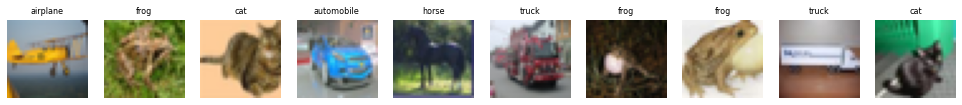

In [3]:
# Define the labels of the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Define the dimensions of the plot grid 
W_grid = 10
L_grid = 1


fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_train = len(X_train) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_train)
    # display an image 
    axes[i].imshow(X_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

 Data Preprocessing

In [6]:
# Scale the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# one-hotencoding
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

Model Building

In [7]:
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
# model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)

2022-04-08 14:50:57.323145: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/software/proxychains/lib:/usr/local/munge/lib:
2022-04-08 14:50:57.323262: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/software/proxychains/lib:/usr/local/munge/lib:
2022-04-08 14:50:57.323327: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/software/proxychains/lib:/usr/local/munge/lib:
2022-04-08 14:50:57.323392: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not lo

In [9]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

Data Augmentations

In [10]:
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_cat_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

In [11]:
r = model.fit(train_generator, 
              epochs=50,
              steps_per_epoch=steps_per_epoch,
              validation_data=(X_test, y_cat_test)) 
             
             

Epoch 1/50
1562/1562 [==============================] - 94s 60ms/step - loss: 1.6967 - accuracy: 0.3800 - precision: 0.6028 - recall: 0.1605 - val_loss: 1.4773 - val_accuracy: 0.4756 - val_precision: 0.6723 - val_recall: 0.3009
Epoch 2/50
1562/1562 [==============================] - 92s 59ms/step - loss: 1.2780 - accuracy: 0.5471 - precision: 0.7192 - recall: 0.3680 - val_loss: 1.0891 - val_accuracy: 0.6066 - val_precision: 0.7616 - val_recall: 0.4676
Epoch 3/50
1562/1562 [==============================] - 92s 59ms/step - loss: 1.0573 - accuracy: 0.6307 - precision: 0.7642 - recall: 0.4943 - val_loss: 0.9281 - val_accuracy: 0.6830 - val_precision: 0.7835 - val_recall: 0.5820
Epoch 4/50
1562/1562 [==============================] - 92s 59ms/step - loss: 0.9403 - accuracy: 0.6764 - precision: 0.7914 - recall: 0.5654 - val_loss: 0.7701 - val_accuracy: 0.7337 - val_precision: 0.8221 - val_recall: 0.6503
Epoch 5/50
1562/1562 [==============================] - 92s 59ms/step - loss: 0.8613 - a

Epoch 37/50
1562/1562 [==============================] - 92s 59ms/step - loss: 0.4139 - accuracy: 0.8585 - precision: 0.8961 - recall: 0.8242 - val_loss: 0.4035 - val_accuracy: 0.8669 - val_precision: 0.8978 - val_recall: 0.8429
Epoch 38/50
1562/1562 [==============================] - 92s 59ms/step - loss: 0.4086 - accuracy: 0.8605 - precision: 0.8979 - recall: 0.8270 - val_loss: 0.4166 - val_accuracy: 0.8570 - val_precision: 0.8908 - val_recall: 0.8341
Epoch 39/50
1562/1562 [==============================] - 92s 59ms/step - loss: 0.4142 - accuracy: 0.8585 - precision: 0.8959 - recall: 0.8251 - val_loss: 0.4679 - val_accuracy: 0.8477 - val_precision: 0.8811 - val_recall: 0.8242
Epoch 40/50
1562/1562 [==============================] - 92s 59ms/step - loss: 0.4016 - accuracy: 0.8620 - precision: 0.8994 - recall: 0.8309 - val_loss: 0.4318 - val_accuracy: 0.8575 - val_precision: 0.8864 - val_recall: 0.8331
Epoch 41/50
1562/1562 [==============================] - 92s 59ms/step - loss: 0.402

Model Evaluation

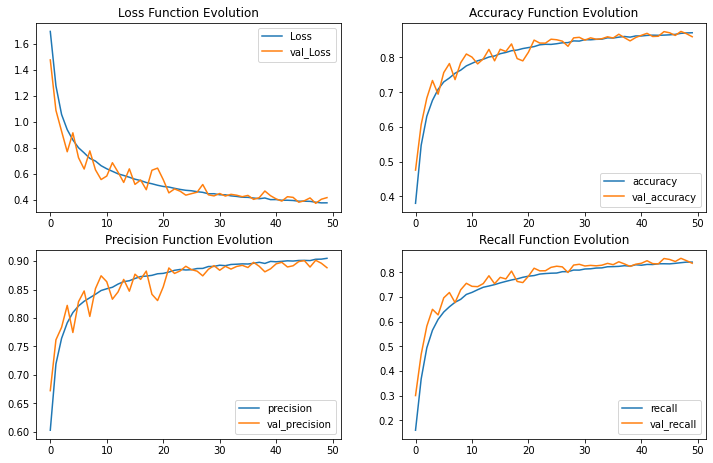

In [12]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall')
plt.legend()

In [13]:
evaluation = model.evaluate(X_test, y_cat_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

313/313 [==============================] - 4s 12ms/step - loss: 0.4170 - accuracy: 0.8597 - precision: 0.8883 - recall: 0.8369
Test Accuracy : 85.97%


In [14]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred)

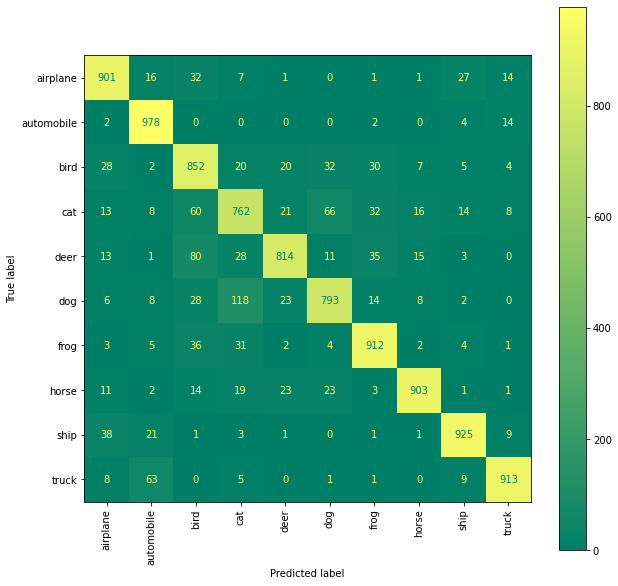

In [15]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1000
           1       0.89      0.98      0.93      1000
           2       0.77      0.85      0.81      1000
           3       0.77      0.76      0.76      1000
           4       0.90      0.81      0.85      1000
           5       0.85      0.79      0.82      1000
           6       0.88      0.91      0.90      1000
           7       0.95      0.90      0.92      1000
           8       0.93      0.93      0.93      1000
           9       0.95      0.91      0.93      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



Test on one image

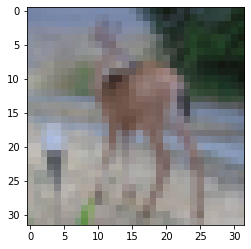

In [17]:
my_image = X_test[10]
plt.imshow(my_image)

In [18]:
# that's a Deer
y_test[10]

array([4], dtype=uint8)

In [19]:
# correctly predicted as a Deer
np.argmax(model.predict(my_image.reshape(1, 32, 32, 3)))

4

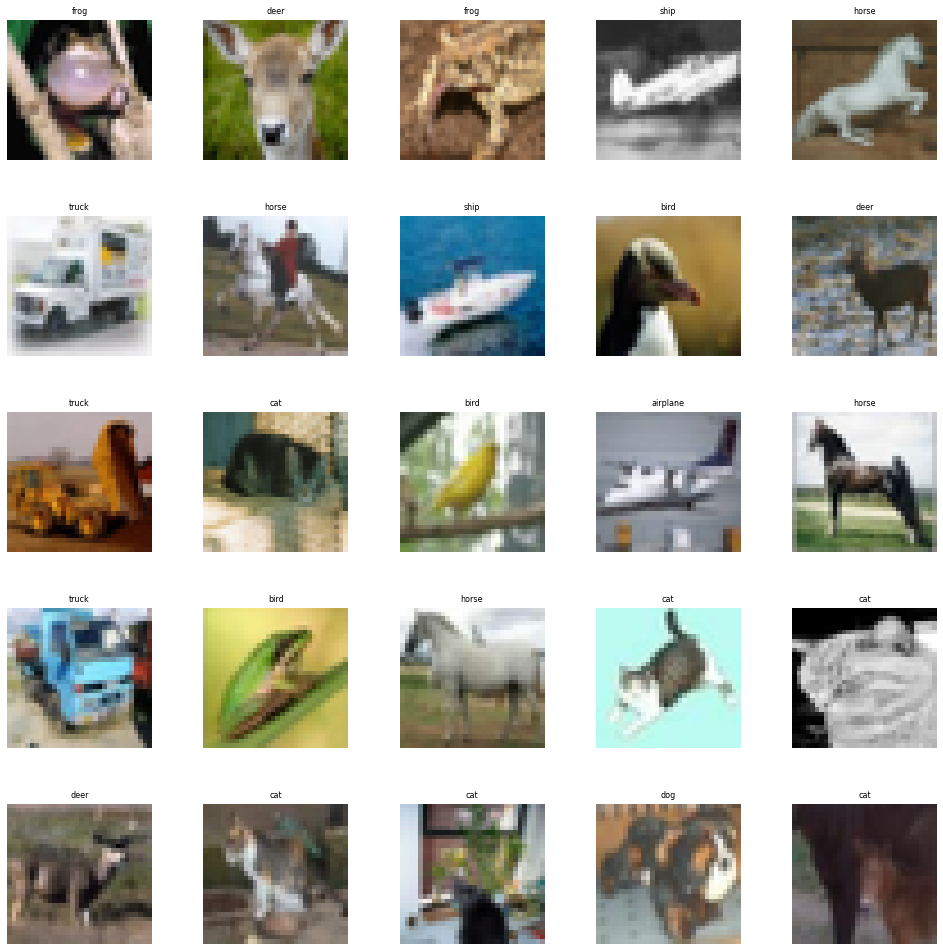

In [20]:
# Define the labels of the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_test = len(X_test) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_test)
    # read and display an image with the selected index    
    axes[i].imshow(X_test[index,1:])
    label_index = int(y_pred[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [21]:
predictions = model.predict(X_test)

In [22]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{labels[int(predicted_label)]} {100*np.max(predictions_array):2.0f}% ({labels[int(true_label)]})", 
               color=color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, int(true_label[i])
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

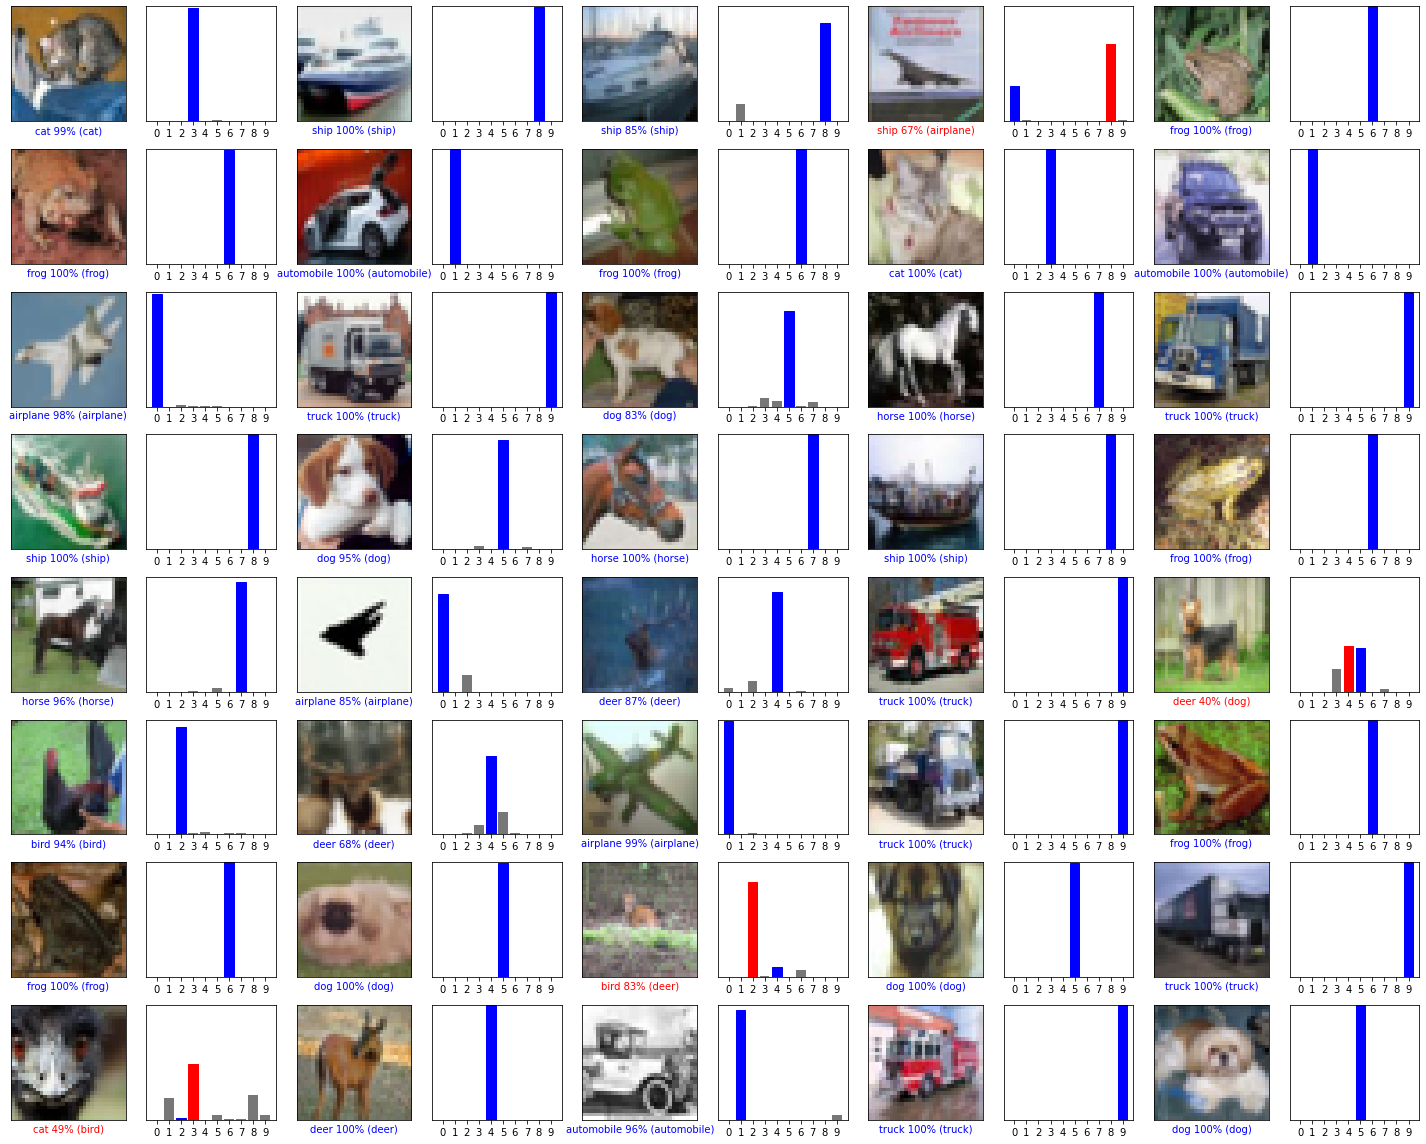

In [23]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 8
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()